In [ ]:
import math
import matplotlib.pyplot as plt

# Parámetros del DDA
radio_esfera = 0.0300
densidad_esfera = 3.50e3
densidad_glicerina = 1.26e3
viscosidad_glicerina = 1.40
GRAVEDAD = 9.81
PI = math.pi
volumen_esfera = (4 * PI * pow(radio_esfera, 3)) / 3
masa_esfera = densidad_esfera * volumen_esfera

#Diferencias Finitas
#derivadaDeV
#Constante A
A = GRAVEDAD * (1 - (densidad_glicerina / densidad_esfera))
#Constante B
B = (6 * PI * radio_esfera * viscosidad_glicerina) / masa_esfera
#funcion velocidad
#tiempo -> instante de tiempo que se quiere calcular su velocidad terminal
#h -> diferencia de tiempo entre t(i+1) - t(i)
#t -> tiempo inicial
#velocidad = velocidad
#numDecimales -> la cantidad de decimales que tiene el h
#Observacion: escribir un h valido para evitar errores

In [ ]:
def v(tiempo,h,numDecimales):
  t = 0.00
  vt = 0.0
  #contador
  i = 0
  velocidades = []
  tiempos = []
  while t <= tiempo:
    if t == 0:
      velocidad = 0
      t = round(t,numDecimales)
      velocidades.append(t)
      tiempos.append(t)
    else:
      velocidad = velocidades[i-1] + h * (A - B * velocidades[i-1])
      velocidades.append(velocidad)
      tiempos.append(t)
    t += h
    i += 1
    t = round(t,numDecimales)
  return velocidad,tiempos,velocidades

Velocidad Terminal (Promedio):  3.1235055694435934


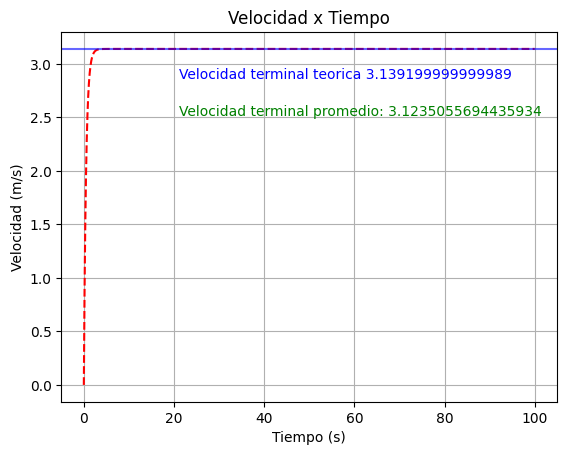

In [ ]:
# Velocidad terminal
#Formula teorica
velocidad_terminal = (2 * pow(radio_esfera, 2) * GRAVEDAD) * \
 (densidad_esfera - densidad_glicerina) / (9 * viscosidad_glicerina)
velocidad_t , tiempos , velocidades = v(100, 0.01,2)
#print(velocidades)
#print(tiempos)
plt.plot(tiempos,velocidades, color = "red", linestyle = "--")
plt.title("Velocidad x Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")

#Dibujar la asintota osea cuando llega a su velocidad terminal
asymptote_index = tiempos.index(max(tiempos, key=abs))
y_asymptote = velocidades[asymptote_index]
plt.axhline(y=y_asymptote, color='blue', alpha = 0.6, label=f'Posible asíntota en y={y_asymptote}')
plt.text(y_asymptote + 18, velocidades[asymptote_index] * 0.91, f"Velocidad terminal teorica {y_asymptote}", color='blue')
plt.grid()

#Velocidad Terminal - Promedio
velocidadTerminalPromedio = sum(velocidades)/len(velocidades)
print("Velocidad Terminal (Promedio): ", velocidadTerminalPromedio)
plt.text(y_asymptote + 18, velocidades[asymptote_index] * 0.80,
         f"Velocidad terminal promedio: {velocidadTerminalPromedio:}",
         color='green')

plt.show()